In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import seaborn as sns

import networkx as nx
from scipy.sparse.csgraph import minimum_spanning_tree

In [2]:
def mst_graph(D: np.ndarray, stock_names: list[str]):
    mst_sparse = minimum_spanning_tree(D)
    mst_coo = mst_sparse.tocoo()

    G = nx.Graph()
    G.add_nodes_from(stock_names)

    for u, v, w in zip(mst_coo.row, mst_coo.col, mst_coo.data):
        G.add_edge(stock_names[u], stock_names[v], weight=float(w), edge_type="mst")
    return G

def mst_threshold_graph(C: np.ndarray, D: np.ndarray, stock_names: list[str], corr_threshold: float):
    G = mst_graph(D, stock_names)
    
    n = C.shape[0]
    for i in range(n):
        for j in range(i + 1, n):
            if C[i, j] >= corr_threshold and not G.has_edge(stock_names[i], stock_names[j]):
                G.add_edge(stock_names[i], stock_names[j], weight=C[i, j], edge_type="threshold")
    return G

In [3]:
df_price = pd.read_csv("data/sector_etf_prices_cleaned.csv")
df_price["Date"] = pd.to_datetime(df_price["Date"], format="%Y-%m-%d")
df_price.head()

,Date,XLF,XLE,XLB,XLI,XLK,XLP,XLU,XLV,XLY
0,2000-01-03,11.147920,6.699404,7.260401,18.125660,20.652037,12.207149,5.551602,20.524780,11.173431
1,2000-01-04,10.660573,6.573295,7.190506,17.624901,19.604296,11.863401,5.384134,20.059031,10.837304
2,2000-01-05,10.576807,6.746694,7.487561,17.546349,19.313255,12.073004,5.520003,19.879078,10.704011
3,2000-01-06,11.041310,7.006792,7.679777,17.782011,18.672977,12.299367,5.510520,19.942583,10.825712
4,2000-01-07,11.224057,7.081667,7.675405,18.459505,18.998936,13.079086,5.557920,20.186050,11.335705


In [4]:
df_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6564 entries, 0 to 6563
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    6564 non-null   datetime64[ns]
 1   XLF     6564 non-null   float64       
 2   XLE     6564 non-null   float64       
 3   XLB     6564 non-null   float64       
 4   XLI     6564 non-null   float64       
 5   XLK     6564 non-null   float64       
 6   XLP     6564 non-null   float64       
 7   XLU     6564 non-null   float64       
 8   XLV     6564 non-null   float64       
 9   XLY     6564 non-null   float64       
dtypes: datetime64[ns](1), float64(9)
memory usage: 512.9 KB


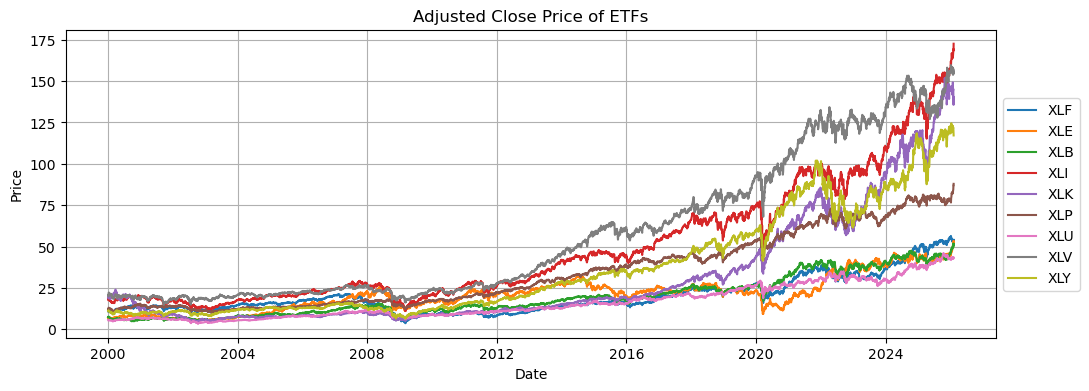

In [5]:
plt.figure(figsize=(12, 4))

for col in df_price.columns[1:]:
    plt.plot(df_price["Date"], df_price[col], label=col)

plt.title("Adjusted Close Price of ETFs")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend(loc="upper left", bbox_to_anchor=(1, 0.8))
plt.grid()
plt.show()

In [6]:
df_logreturns = pd.DataFrame()
df_logreturns["Date"] = df_price["Date"]

for col in df_price.columns[1:]:
    df_logreturns[col] = np.log(df_price[col]) - np.log(df_price[col].shift(1))

df_logreturns = df_logreturns.dropna()
df_logreturns.head()

,Date,XLF,XLE,XLB,XLI,XLK,XLP,XLU,XLV,XLY
1,2000-01-04,-0.044701,-0.019003,-0.009674,-0.028016,-0.052065,-0.028564,-0.030630,-0.022953,-0.030544
2,2000-01-05,-0.007889,0.026037,0.040482,-0.004467,-0.014957,0.017514,0.024922,-0.009012,-0.012376
3,2000-01-06,0.042980,0.037827,0.025347,0.013341,-0.033714,0.018576,-0.001719,0.003189,0.011306
4,2000-01-07,0.016416,0.010629,-0.000569,0.037392,0.017306,0.061467,0.008565,0.012134,0.046033
5,2000-01-10,-0.017796,-0.008383,-0.003420,0.000000,0.037286,-0.022691,0.003405,0.097358,-0.005126


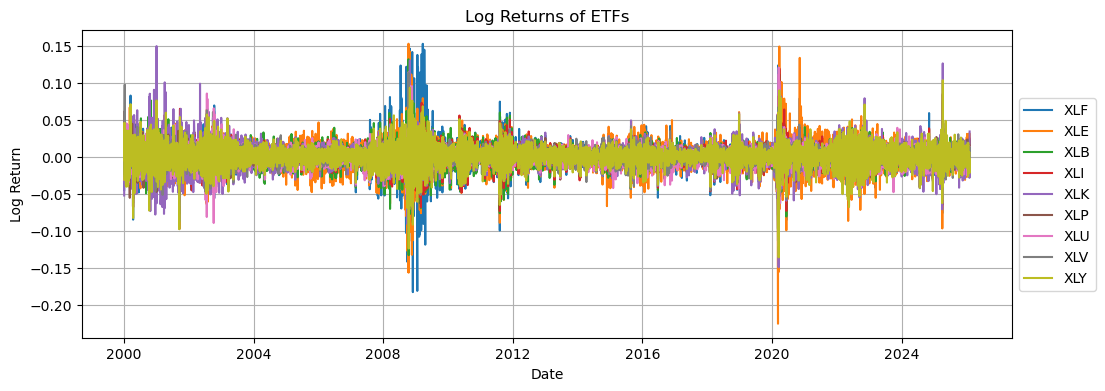

In [7]:
plt.figure(figsize=(12, 4))

for col in df_logreturns.columns[1:]:
    plt.plot(df_logreturns["Date"], df_logreturns[col], label=col)

plt.title("Log Returns of ETFs")
plt.xlabel("Date")
plt.ylabel("Log Return")
plt.legend(loc="upper left", bbox_to_anchor=(1, 0.8))
plt.grid()
plt.show()

In [8]:
df_logreturns.iloc[:, 1:].describe()
for col in df_logreturns.columns[1:]:
    print(f"{col} Skewness: {df_logreturns[col].skew():.4f}")
    print(f"{col} Kurtosis: {df_logreturns[col].kurtosis():.4f}\n")

XLF Skewness: -0.1585
XLF Kurtosis: 15.2327

XLE Skewness: -0.6509
XLE Kurtosis: 12.2708

XLB Skewness: -0.2149
XLB Kurtosis: 6.7397

XLI Skewness: -0.3412
XLI Kurtosis: 8.0731

XLK Skewness: 0.0889
XLK Kurtosis: 7.3097

XLP Skewness: -0.2651
XLP Kurtosis: 8.6955

XLU Skewness: -0.0563
XLU Kurtosis: 11.6127

XLV Skewness: -0.2352
XLV Kurtosis: 9.2104

XLY Skewness: -0.3637
XLY Kurtosis: 6.7744



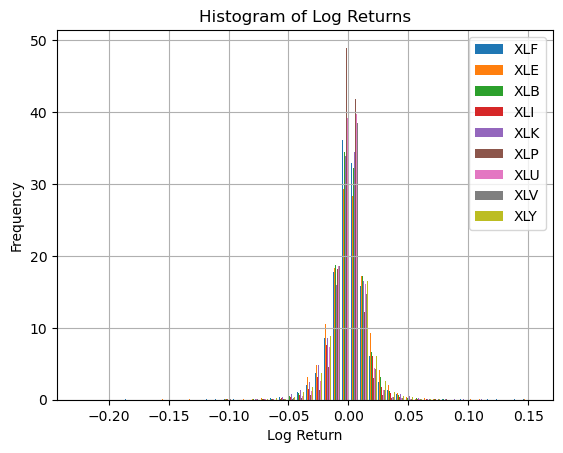

In [9]:
plt.hist(df_logreturns.iloc[:, 1:], bins=50, density=True, label=df_logreturns.columns[1:])
plt.title("Histogram of Log Returns")
plt.xlabel("Log Return")
plt.ylabel("Frequency")
plt.legend(loc="upper right")
plt.grid()
plt.show()

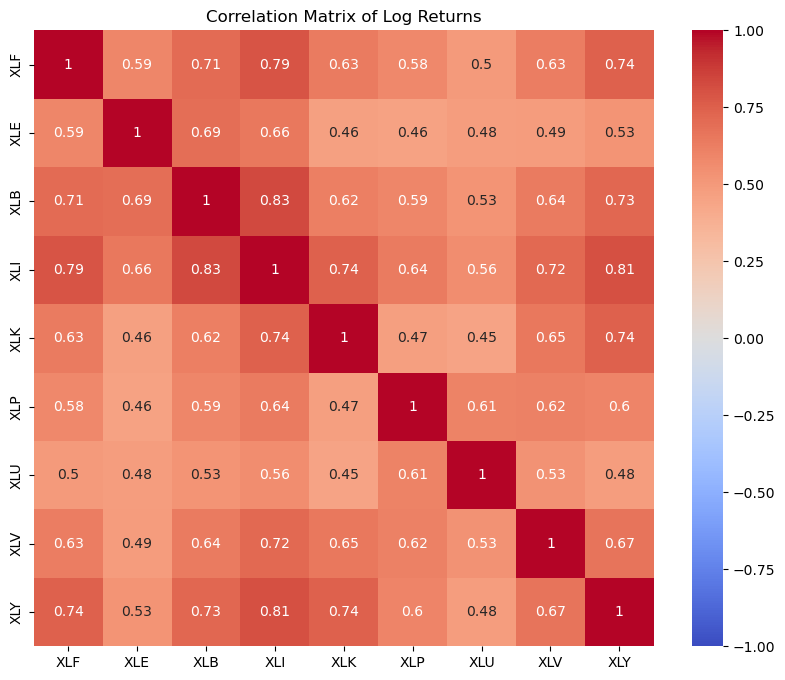

In [10]:
corrlation_matrix = df_logreturns.iloc[:, 1:].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corrlation_matrix, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Correlation Matrix of Log Returns")
plt.show()

In [11]:
epoch_length = 40
epoch_shift = 20

stock_names = df_logreturns.columns[1:].tolist()

correlation_matrices = []
distance_matrices = []
mu_values = []
epoch_dates = []

for i in range(0, len(df_logreturns) - epoch_length, epoch_shift):
  epoch = df_logreturns.iloc[i:i+epoch_length]

  correlation_matrix = epoch.iloc[:, 1:].corr().values
  distance_matrix = np.sqrt(2 * (1 - correlation_matrix))
  mu = np.mean(correlation_matrix)

  correlation_matrices.append(correlation_matrix)
  distance_matrices.append(distance_matrix)
  mu_values.append(mu)

  epoch_dates.append(epoch["Date"].iloc[-1])

print(len(correlation_matrices))

327


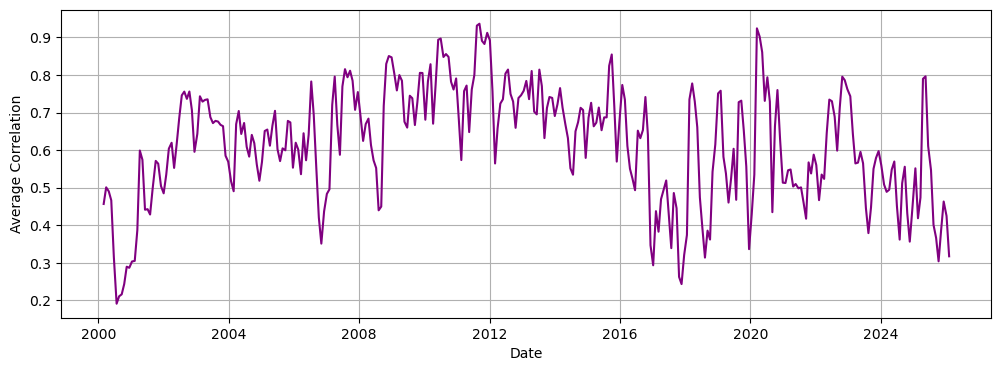

In [12]:
plt.figure(figsize=(12, 4))

plt.plot(epoch_dates, mu_values, color="purple", label="Average Correlation")
plt.ylabel("Average Correlation")
plt.xlabel("Date")
plt.grid()
plt.show()

In [13]:
graphs = []
for C, D in zip(correlation_matrices, distance_matrices):
    G = mst_threshold_graph(C, D, stock_names=stock_names, corr_threshold=0.75)
    graphs.append(G)

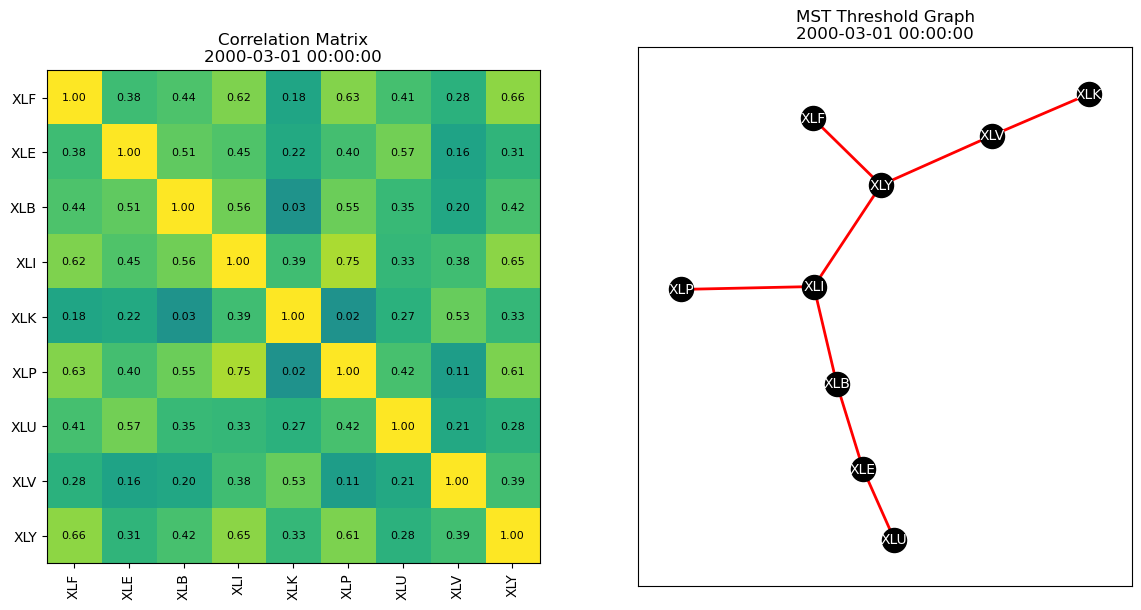

In [14]:
fig, axes = plt.subplots(1, 2, figsize=(14, 7))

def update(frame):
    axes[0].clear()
    axes[1].clear()

    C = correlation_matrices[frame]
    im = axes[0].imshow(C, vmin=-1, vmax=1)

    axes[0].set_title(f"Correlation Matrix\n{epoch_dates[frame]}")
    axes[0].set_xticks(range(n_assets))
    axes[0].set_yticks(range(n_assets))
    axes[0].set_xticklabels(tickers, rotation=90)
    axes[0].set_yticklabels(tickers)
    for i in range(n_assets):
        for j in range(n_assets):
            val = C[i, j]
            axes[0].text(j, i, f"{val:.2f}", ha="center", va="center", fontsize=8, color="black")
    axes[0].set_aspect("equal")

    G = graphs[frame]
    pos = nx.spring_layout(G, seed=42)

    mst_edges = [(u, v) for u, v, d in G.edges(data=True) if d["edge_type"] == "mst"]

    nx.draw_networkx_nodes(G, pos, ax=axes[1], node_size=300, node_color="black")
    nx.draw_networkx_edges(G, pos, ax=axes[1], edgelist=mst_edges, width=2, edge_color="red")
    nx.draw_networkx_labels(G, pos, ax=axes[1], font_size=10, font_color="white")

    axes[1].set_title(f"MST Threshold Graph\n{epoch_dates[frame]}")
    
    return axes
    

tickers = df_logreturns.columns[1:]
n_assets = len(tickers)
ani = animation.FuncAnimation(fig, update, frames=len(correlation_matrices), interval=500, repeat=False)
ani.save("Correlation_Dynamics_2000.gif",writer="pillow",dpi=150)